# Практическая работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 0383 Бояркин Никита и Сергевнин Дмитрий. Вариант №19.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения

**Передаточная функция** - это математическое выражение, которое характеризует отношение между входным и выходным сигналами в системе. Она описывает, как система реагирует на различные частоты входного сигнала.

**Нерекурсивные фильтры** - это фильтры с конечной импульсной характеристикой (КИХ). Они характеризуются тем, что импульсная характеристика фильтра становится нулевой после определенного момента времени. Этот тип фильтров также известен как нерекурсивные из-за отсутствия обратной связи:

$$y_n = \sum_{k=0}^{N}c_kx_{n-k}$$

При $x_n=e^{i\omega n}$:

$$H(w)=\sum_{k=0}^{N}c_ke^{-i\omega k} \qquad y_n=H(w)x_n$$

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

## Выполнение работы

0. Импорт библиотек

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

1. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

$y(t) = A+Bt$

$F(A,B) = \sum_{k=-m}^{k=m}(s_k-y_k)^2 = \sum_{k=-m}^{k=m}(s_k-A-Bk)^2 \Rightarrow \min$


$H(\omega, m)=\frac1{2m+1} \sum_{k=n-m}^{k=n+m}e^{i \omega k}=\frac{\sin(\frac{(2m+1)\omega}{2})}{(2m+1) \sin(\frac{\omega}{2})}$

$\tilde{H}(f, m)=H(2\pi f, m)=\frac{\sin((2m+1)\pi f)}{(2m+1) \sin(\pi f)}$

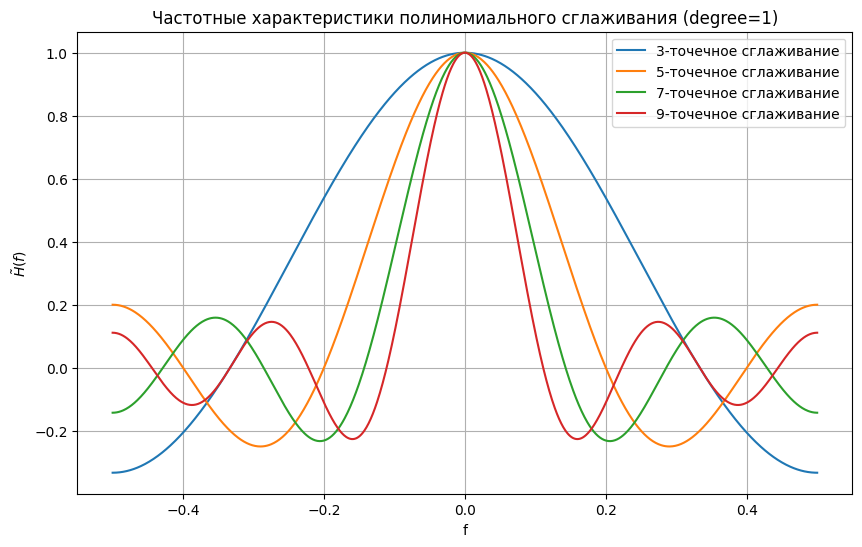

In [47]:
def calculate_tilde_Hf_degree_1(M):
    # Расчет передаточной функции с 2 * m + 1 точками
    # частоты от -pi до pi для w или от -0.5 до 0.5 для f
    frequencies = np.linspace(-0.5, 0.5, 1000)

    w = frequencies * 2 * np.pi
    tilde_Hf = np.sin(M * w / 2) / ( M * np.sin(w / 2) )

    return frequencies, tilde_Hf

# 3, 5, 7, 9 точечное сглаживание
orders = [2 * m + 1 for m in range(1, 5)]

plt.figure(figsize=(10, 6))
for order in orders:
    frequencies, tilde_Hf = calculate_tilde_Hf_degree_1(order)
    plt.plot(frequencies, tilde_Hf, label=f'{order}-точечное сглаживание')

plt.title('Частотные характеристики полиномиального сглаживания (degree=1)')
plt.xlabel('f')
plt.ylabel(r'$\tilde H(f)$')
plt.legend()
plt.grid()
plt.show()

На основе полученной кривой видно, что частота  $f = 0$ проходит через фильтр с неизменной амплитудой, в то время как все остальные частоты претерпевают ослабление. Увеличение числа членов, используемых в передаточной функции, ускоряет колебания функции, что приводит к более быстрому спаду кривой вблизи $f = 0$. Вместе с этим, увеличение числа точек приводит к уменьшению амплитуды колебательных изменений. Кроме того, графики симметричны относительно нуля.

2. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Формула для передаточной функции нерекурсивного фильтра для 7 точек:
$$H(\omega)=\frac{1}{21}[7+12cos(\omega)+6cos(2\omega)-4cos(3\omega)]$$

для 9 точек:
$$H(\omega)=\frac{1}{231}[59+108cos(\omega)+78cos(2\omega)+28cos(3\omega)-42cos(4\omega)]$$

для 11 точек:
$$H(\omega)=\frac{1}{429}[89+168cos(\omega)+138cos(2\omega)+88cos(3\omega)+18cos(4\omega)-72cos(5\omega)]$$

для 13 точек:
$$H(\omega)=\frac{1}{143}[25+48cos(\omega)+42cos(2\omega)+32cos(3\omega)+18cos(4\omega)-22cos(5\omega)]$$

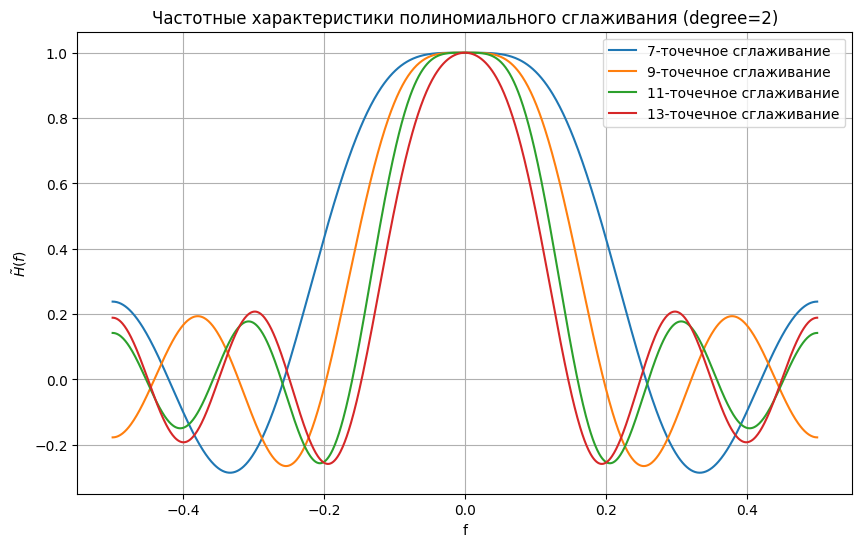

In [55]:
def calculate_tilde_Hf_degree_2(M):
    # Расчет передаточной функции с 2 * m + 1 точками
    # частоты от -pi до pi для w или от -0.5 до 0.5 для f
    frequencies = np.linspace(-0.5, 0.5, 1000)

    w = frequencies * 2 * np.pi
    tilde_Hf = None
    if M == 7:
        tilde_Hf = (1/21) * (7 + 12 * np.cos(w) + 6 * np.cos(2*w) - 4 * np.cos(3*w))
    elif M == 9:
        tilde_Hf = (1/231) * (59 + 108 * np.cos(w) + 78 * np.cos(2*w) + 28 * np.cos(3*w) - 42 * np.cos(4*w))
    elif M == 11:
        tilde_Hf = (1/429) * (89 + 168 * np.cos(w) + 138 * np.cos(2*w) + 88 * np.cos(3*w) + 18 * np.cos(4*w) - 72 * np.cos(5*w))
    elif M == 13:
        tilde_Hf = (1/143) * (25 + 48 * np.cos(w) + 42 * np.cos(2*w) + 32 * np.cos(3*w) + 18 * np.cos(4*w) - 22 * np.cos(5*w))

    return frequencies, tilde_Hf

# 7, 9, 11, 13 точечное сглаживание
orders = [2 * m + 1 for m in range(3, 7)]

plt.figure(figsize=(10, 6))
for order in orders:
    frequencies, tilde_Hf = calculate_tilde_Hf_degree_2(order)
    plt.plot(frequencies, tilde_Hf, label=f'{order}-точечное сглаживание')

plt.title('Частотные характеристики полиномиального сглаживания (degree=2)')
plt.xlabel('f')
plt.ylabel(r'$\tilde H(f)$')
plt.legend()
plt.grid()
plt.show()

При увеличении количества точек степень касания в окрестности нуля возрастает, расширяя зону пропуска сигнала без искажений. Основным заметным отличием является более высокий порядок касания в точке $f = 0$.

3. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Для 9 точек:
$$H(\omega) = \frac{1}{429}\big[179 + 270cos(\omega) + 60cos(2\omega) - 110cos(3\omega) + 30cos(4\omega)\big]$$

Для 11 точек:
$$H(\omega) = \frac{1}{429}\big[143 + 240cos(\omega) + 120 cos(2\omega) - 20 cos(3\omega) - 90cos(4\omega) + 36cos(5\omega)\big]$$

Для 13 точек:
$$H(\omega) = \frac{1}{2431}\big[677 + 1200cos(\omega) + 780cos(2\omega) + 220 cos(3\omega) - 270cos(4\omega) - 396cos(5\omega) + 220cos(6\omega)\big]$$

Для 15 точек:
$$H(\omega) = \frac{1}{46189}\big[11063 + 20250cos(\omega) + 15000cos(2\omega) + 7510cos(3\omega) - 330cos(4\omega) - 5874cos(5\omega) - 5720cos(6\omega) + 4290cos(7\omega)\big]$$

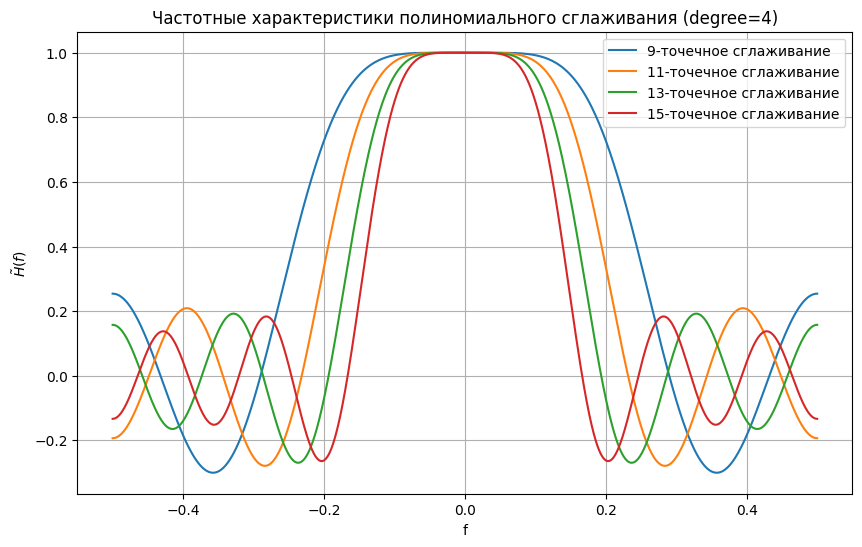

In [56]:
def calculate_tilde_Hf_degree_4(M):
    # Расчет передаточной функции с 2 * m + 1 точками
    # частоты от -pi до pi для w или от -0.5 до 0.5 для f
    frequencies = np.linspace(-0.5, 0.5, 1000)

    w = frequencies * 2 * np.pi
    tilde_Hf = None
    if M == 9:
        tilde_Hf = (1/429) * (179 + 270 * np.cos(w) + 60 * np.cos(2*w) - 110 * np.cos(3*w) + 30 * np.cos(4*w))
    elif M == 11:
        tilde_Hf = (1/429) * (143 + 240 * np.cos(w) + 120 * np.cos(2*w) - 20 * np.cos(3*w) - 90 * np.cos(4*w) + 36 * np.cos(5*w))
    elif M == 13:
        tilde_Hf = (1/2431) * (677 + 1200 * np.cos(w) + 780 * np.cos(2*w) + 220 * np.cos(3*w) - 270 * np.cos(4*w) - 396 * np.cos(5*w) + 220 * np.cos(6*w))
    elif M == 15:
        tilde_Hf = (1/46189) * (11063 + 20250 * np.cos(w) + 15000 * np.cos(2*w) + 7510 * np.cos(3*w) - 330 * np.cos(4*w) - 5874 * np.cos(5*w) - 5720 * np.cos(6*w) + 4290 * np.cos(7*w))

    return frequencies, tilde_Hf

# 9, 11, 13, 15 точечное сглаживание
orders = [2 * m + 1 for m in range(4, 8)]

plt.figure(figsize=(10, 6))
for order in orders:
    frequencies, tilde_Hf = calculate_tilde_Hf_degree_4(order)
    plt.plot(frequencies, tilde_Hf, label=f'{order}-точечное сглаживание')

plt.title('Частотные характеристики полиномиального сглаживания (degree=4)')
plt.xlabel('f')
plt.ylabel(r'$\tilde H(f)$')
plt.legend()
plt.grid()
plt.show()

На основе графика мы приходим к тем же выводам, что и ранее обсуждалось в предыдущих пунктах.

4. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

по 15 точкам:

$$H(\omega)=\frac{1}{320}\big[74 + 134cos(\omega)+92cos(2\omega)+42cos(3\omega)+6cos(4\omega)-10cos(5\omega)-12cos(6\omega)-6cos(7\omega)\big]$$

по 21 точкам:

$$H(\omega)=\frac{1}{350}\big[60 + 114cos(\omega)+94cos(2\omega)+66cos(3\omega)+36cos(4\omega)+12cos(5\omega)-4cos(6\omega)-10cos(7\omega)-10cos(8\omega)-6cos(9\omega)-2cos(10\omega)\big]$$

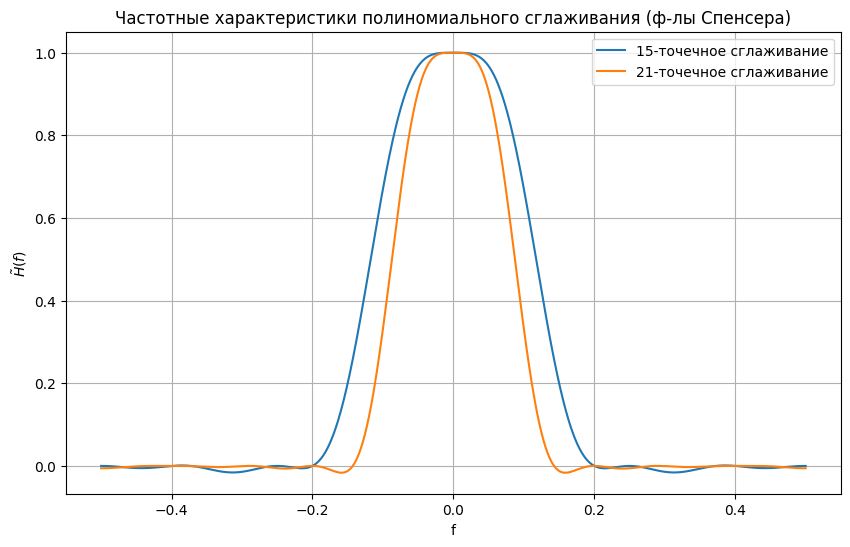

In [44]:
def calculate_using_Spencer(M):
    # Расчет передаточной функции с 2 * m + 1 точками
    # частоты от -pi до pi для w или от -0.5 до 0.5 для f
    frequencies = np.linspace(-0.5, 0.5, 1000)

    w = frequencies * 2 * np.pi
    tilde_Hf = None
    if M == 15:
        tilde_Hf = (1/320) * (74 + 134*np.cos(w) + 92*np.cos(2*w) + 42*np.cos(3*w) + 6*np.cos(4*w) - 10*np.cos(5*w) - 12*np.cos(6*w) - 6*np.cos(7*w))
    elif M == 21:
        tilde_Hf = (1/350) * (60 + 114*np.cos(w) + 94*np.cos(2*w) + 66*np.cos(3*w) + 36*np.cos(4*w) + 12*np.cos(5*w) - 4*np.cos(6*w) - 10*np.cos(7*w) - 10*np.cos(8*w) - 6*np.cos(9*w) - 2*np.cos(10*w))

    return frequencies, tilde_Hf

# 15, 21 точечное сглаживание
orders = [15, 21]

plt.figure(figsize=(10, 6))
for order in orders:
    frequencies, tilde_Hf = calculate_using_Spencer(order)
    plt.plot(frequencies, tilde_Hf, label=f'{order}-точечное сглаживание')

plt.title('Частотные характеристики полиномиального сглаживания (ф-лы Спенсера)')
plt.xlabel('f')
plt.ylabel(r'$\tilde H(f)$')
plt.legend()
plt.grid()
plt.show()

Оба сглаживания сохраняют высокую амплитуду на нулевой частоте, демонстрируют быстрый спад и минимальные колебания. Увеличение числа точек ускоряет спад кривых и снижает амплитуду колебаний.

5. Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объясните, чем отличаются данные графики от полученных ранее и объясните их смысл.

Децибел - это логарифмическая единица измерения, обозначаемая как Дб, определяемая выражением:

$$20 \cdot \log_{10}\Big(\frac{|y_n|}{|s_n|}\Big) = Дб$$

In [45]:
def amplitude_to_db(amplitude):
    """
    Функция для перевода амплитуды в децибелы.
    """
    return 20 * np.log10(np.abs(amplitude))

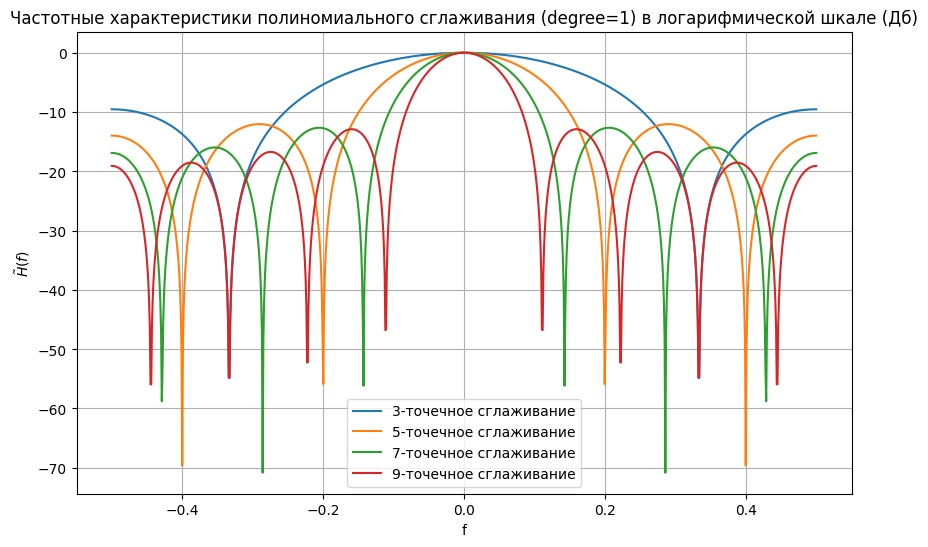

In [48]:
# 3, 5, 7, 9 точечное сглаживание
orders = [2 * m + 1 for m in range(1, 5)]

plt.figure(figsize=(10, 6))
for order in orders:
    frequencies, tilde_Hf = calculate_tilde_Hf_degree_1(order)
    plt.plot(frequencies, amplitude_to_db(tilde_Hf), label=f'{order}-точечное сглаживание')

plt.title('Частотные характеристики полиномиального сглаживания (degree=1) в логарифмической шкале (Дб)')
plt.xlabel('f')
plt.ylabel(r'$\tilde H(f)$')
plt.legend()
plt.grid()
plt.show()

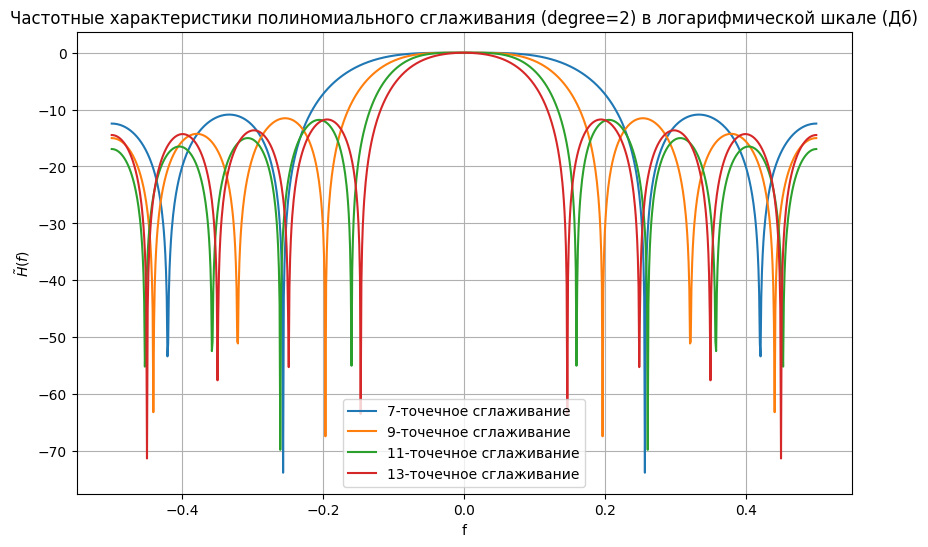

In [51]:
# 7, 9, 11, 13 точечное сглаживание
orders = [2 * m + 1 for m in range(3, 7)]

plt.figure(figsize=(10, 6))
for order in orders:
    frequencies, tilde_Hf = calculate_tilde_Hf_degree_2(order)
    plt.plot(frequencies, amplitude_to_db(tilde_Hf), label=f'{order}-точечное сглаживание')

plt.title('Частотные характеристики полиномиального сглаживания (degree=2) в логарифмической шкале (Дб)')
plt.xlabel('f')
plt.ylabel(r'$\tilde H(f)$')
plt.legend()
plt.grid()
plt.show()

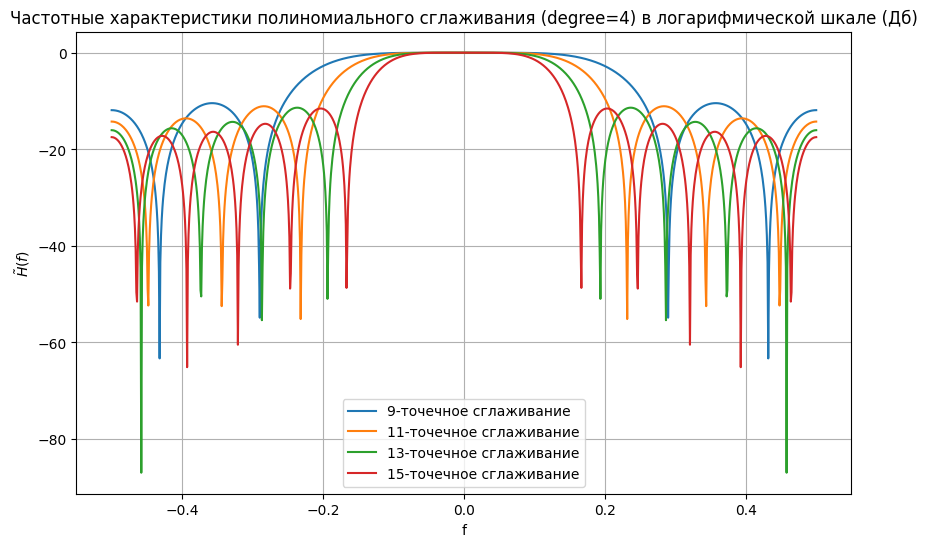

In [52]:
# 9, 11, 13, 15 точечное сглаживание
orders = [2 * m + 1 for m in range(4, 8)]

plt.figure(figsize=(10, 6))
for order in orders:
    frequencies, tilde_Hf = calculate_tilde_Hf_degree_4(order)
    plt.plot(frequencies, amplitude_to_db(tilde_Hf), label=f'{order}-точечное сглаживание')

plt.title('Частотные характеристики полиномиального сглаживания (degree=4) в логарифмической шкале (Дб)')
plt.xlabel('f')
plt.ylabel(r'$\tilde H(f)$')
plt.legend()
plt.grid()
plt.show()

<ipython-input-45-5480fd0e980d>:5: RuntimeWarning: divide by zero encountered in log10
  return 20 * np.log10(np.abs(amplitude))


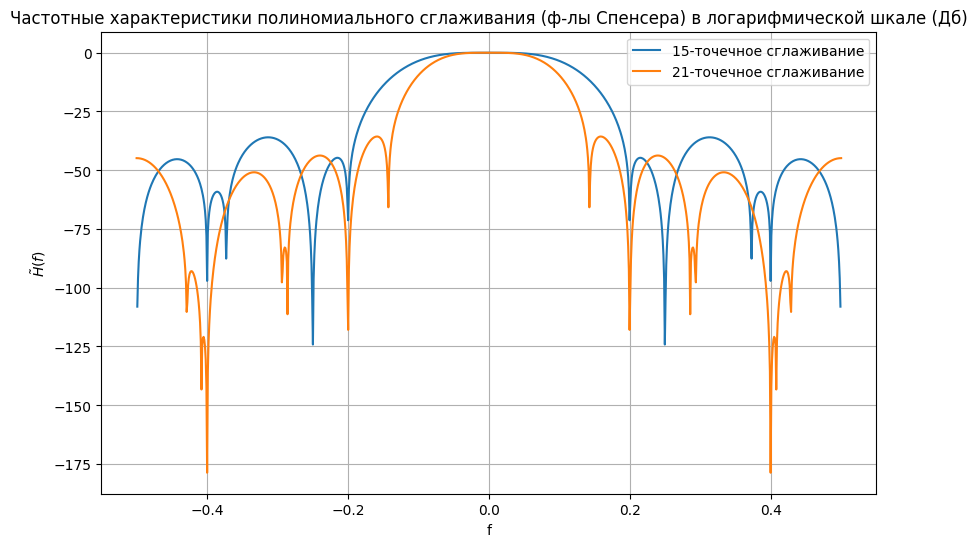

In [54]:
# 15, 21 точечное сглаживание
orders = [15, 21]

plt.figure(figsize=(10, 6))
for order in orders:
    frequencies, tilde_Hf = calculate_using_Spencer(order)
    plt.plot(frequencies, amplitude_to_db(tilde_Hf), label=f'{order}-точечное сглаживание')

plt.title('Частотные характеристики полиномиального сглаживания (ф-лы Спенсера) в логарифмической шкале (Дб)')
plt.xlabel('f')
plt.ylabel(r'$\tilde H(f)$')
plt.legend()
plt.grid()
plt.show()

Логарифмическая шкала упрощает визуализацию значительных изменений. В результате можно сделать вывод о том, что формулы сглаживания эффективно уменьшают влияние определенных частот, в то время как другие частоты остаются практически неизменными.

6. Провести сопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1–4.

Сводя к общему, полученные передаточные функции обладают рядом общих характеристик:
1. **Симметрия графиков относительно нуля** является общим свойством для всех формул сглаживания.
2. **При увеличении степени полинома сглаживания** расширяется полоса пропускания сигнала без искажений.
3. **Увеличение количества точек сглаживания** приводит к более крутым графикам передаточной функции и уменьшению амплитуды колебаний.
4. Использование **формул Спенсера** обеспечивает пропускание низких частот и заграждение высоких.

## Выводы

При выполнении практической работы был проведен анализ частотных характеристик формул полиномиального сглаживания временных рядов. Исследование охватило полиномы второй и четвертой степеней, а также формулы Спенсера.

Сравнивая полученные передаточные функции, можно сделать следующие выводы:
- **Увеличение количества точек** приводит к увеличению частоты колебаний, крутизне графика и уменьшению амплитуды колебаний.
- **Увеличение степени полинома сглаживания** расширяет полосу пропускания сигнала, увеличивая порядок касания у нулевой частоты.
- Нулевая частота сигнала **не подвержена искажениям** при изменении параметров сглаживания.
- Использование **формул Спенсера** снижает амплитуду колебаний и увеличивает порядок касания у нулевой частоты.